In [2]:
import pandas as pd 
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
# Data Frame cdr and city combined data sets
cdr = pd.read_csv('CDRCombined.csv')
cdr.head()

,opeid,stateabv,state,county,city,name,address,zipcode,zipext,proglength,...,laborforceparticipation,unemploymentrate,racewhite,raceblack,raceasian,racenative,racepacific,raceother,racemultiple,stateabv2
0,1002,AL,Alabama,Madison,Normal,ALABAMA AGRICULTURAL & MECHANICAL UNIVERSITY ...,4900 MERIDIAN STREET ...,35762,1357,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003,AL,Alabama,Montgomery,Montgomery,FAULKNER UNIVERSITY ...,5345 ATLANTA HIGHWAY ...,36109,3398,8,...,61.8,7.9,34.1,60.0,2.5,0.2,0.0,1.3,1.9,NaN
2,1004,AL,Alabama,Shelby,Montevallo,UNIVERSITY OF MONTEVALLO ...,PALMER CIRCLE ...,35115,6000,8,...,57.9,10.8,71.4,23.0,0.5,0.0,0.2,3.4,1.5,NaN
3,1005,AL,Alabama,Montgomery,Montgomery,ALABAMA STATE UNIVERSITY ...,915 SOUTH JACKSON STREET ...,36104,5714,8,...,61.8,7.9,34.1,60.0,2.5,0.2,0.0,1.3,1.9,NaN
4,1007,AL,Alabama,Tallapoosa,Alexander City,CENTRAL ALABAMA COMMUNITY COLLEGE ...,1675 CHEROKEE ROAD ...,35010,0,5,...,51.0,11.6,59.3,35.8,1.0,0.3,0.0,2.8,0.8,NaN


# Remove '\n' from variable names
columns = [] # temp array 

for i in range(0, len(cdr.columns)):
    columns.append(cdr.columns[i].replace('\n', ''))
    
cdr.columns = columns # chnage variable names

# Show data variabels and type
cdr.dtypes

# Clean up column and remove redundant variabels 
new_names = {"denom1": "cohort_2016", "drate1": "cdr_2016", "prate1": "prate_2016", 
             "denom2": "cohort_2015", "drate2": "cdr_2015", "prate2": "prate_2015", 
             "denom3": "cohort_2014", "drate3": "cdr_2014", "prate3": "prate_2014"}
# Set Names 
cdr.rename(columns = new_names)


# Get columns by type 
cdr._get_numeric_data().columns

# Get hit map of 0-20 variables 
sb.heatmap(cdr[cdr.columns[0:20]].isnull())

# Get hit map of 20-40 variables 
sb.heatmap(cdr[cdr.columns[20:40]].isnull())

# Get hit map of 20-40 variables 
sb.heatmap(cdr[cdr.columns[40:57]].isnull())

# Get variable with missing values 
variable_missing = []
for c in cdr.columns:
    for v in cdr[c].isnull():
        if v:
            variable_missing.append(c)
            break

sb.heatmap(cdr[variable_missing].isnull())

# Get variables with missing and count of missing values 
cdr.isnull().sum()

# Get correlation 
corr = cdr.corr()
print(corr)

sb.heatmap(corr, xticklabels=2, vmin = 0, vmax = 0.5)

sb.heatmap()

In [4]:
# Working with varibales 
nVar = []   # numeric variables
sVar = []   # string variables 
mVar = []   # missing values

for v in cdr.columns: 
    if v not in cdr._get_numeric_data().columns:
        sVar.append(v)
    else:
        nVar.append(v)
    
    if cdr[v].isnull().sum() > 0:
        mVar.append(v)

print("String Variables: " , sVar, "\nNumeric Variables: ", nVar, "\nVariables with missing values: ", mVar)

String Variables:  ['stateabv', 'state', 'county', 'city', 'name', 'address', 'prate1', 'congdis', 'prate2', 'prate3', 'stateabv2'] 
Numeric Variables:  ['opeid', 'zipcode', 'zipext', 'proglength', 'schooltype', 'year1', 'num1', 'denom1', 'drate1', 'ethniccode', 'region', 'averageorgreaterthan30', 'year2', 'num2', 'denom2', 'drate2', 'year3', 'num3', 'denom3', 'drate3', 'lat', 'lng', 'population', 'density', 'military', 'agemedian', 'male', 'female', 'married', 'familysize', 'incomehouseholdmedian', 'incomehouseholdsixfigure', 'homeownership', 'homevalue', 'rentmedian', 'educationcollegeorabove', 'laborforceparticipation', 'unemploymentrate', 'racewhite', 'raceblack', 'raceasian', 'racenative', 'racepacific', 'raceother', 'racemultiple'] 
Variables with missing values:  ['stateabv', 'county', 'num2', 'denom2', 'drate2', 'prate2', 'num3', 'denom3', 'drate3', 'prate3', 'population', 'density', 'agemedian', 'male', 'female', 'married', 'familysize', 'incomehouseholdmedian', 'incomehouseho

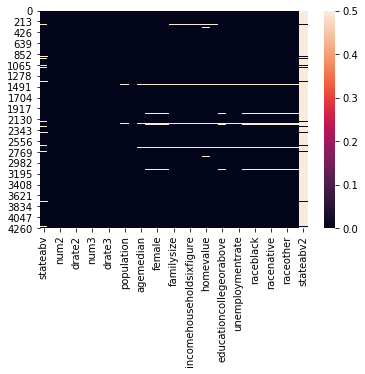

In [5]:
# Get all missing variables 
sb.heatmap(cdr[mVar].isnull(), xticklabels=2, vmin = 0, vmax = 0.5)

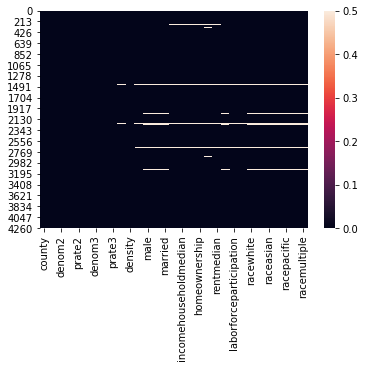

In [18]:
# Match missing stateabv variables 'stateabv' 'stateabv2'
for i in list(cdr[cdr['stateabv'].isnull()].index):
    cdr['stateabv'][i] = cdr['stateabv2'][i]

sb.heatmap(cdr[mVar].isnull(), xticklabels=2, vmin = 0, vmax = 0.5)

In [7]:
# Remove stateabv from array mVar and stateabv2 from cbr
if 'stateabv' in mVar: 
    mVar.remove('stateabv')

if 'stateabv2' in mVar: 
    mVar.remove('stateabv2')

# Remove variable 'stateabv2'
if 'stateabv2' in list(cdr.columns): 
    print("Original: ", len(cdr.columns))    # number of varibales 
    cdr.drop(['stateabv2'], axis=1, inplace = True)
    print("After Drop: ", len(cdr.columns))    # number of varibales 

Original:  56
After Drop:  55


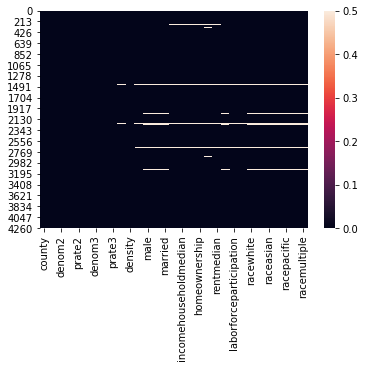

In [8]:
sb.heatmap(cdr[mVar].isnull(), xticklabels=2, vmin = 0, vmax = 0.5)

In [9]:
# Remove rows with more the 5 missing data points 
cdr_null_work = cdr.loc[cdr.isnull().sum(axis = 1) <= 5]

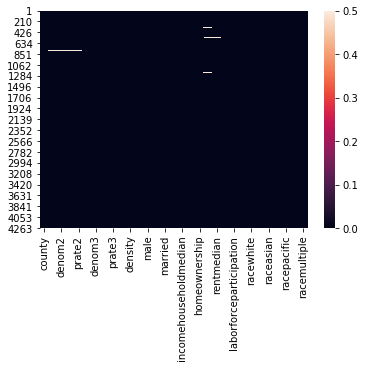

In [10]:
sb.heatmap(cdr_null_work[mVar].isnull(), xticklabels=2, vmin = 0, vmax = 0.5)

In [11]:
# Get new null array list 
mVar2 = []
for v in mVar:
    if cdr_null_work[v].isnull().sum() > 0:
        mVar2.append(v)
# Add state to list
mVar2.append('state')


In [12]:
# count number of row each state has 
full = cdr_null_work.groupby('state').state.agg('count')
missing = cdr_null_work[cdr_null_work[mVar2].isnull().any(axis = 1)].groupby('state').state.agg('count')

# Data overview will out removing remaming missing values 
full

state
Alabama                  52
Alaska                    8
Arizona                  62
Arkansas                 62
California              450
Colorado                 76
Connecticut              52
Delaware                 14
District of Columbia     13
Florida                 187
Georgia                 103
Hawaii                   18
Idaho                    29
Illinois                203
Indiana                  78
Iowa                     76
Kansas                   64
Kentucky                 65
Louisiana                69
Maine                    35
Maryland                 61
Massachusetts           122
Michigan                109
Minnesota                84
Mississippi              34
Missouri                132
Montana                  22
Nebraska                 36
Nevada                   23
New Hampshire            32
New Jersey               92
New Mexico               25
New York                293
North Carolina          124
North Dakota             20
Ohio          

In [13]:
# What data looks like if remaining missing values are removed 
for key, value in full.items():
    if key in missing: 
        print(key, " ", value - missing[key])
    else: 
        print(key, " ", value)

Alabama   52
Alaska   8
Arizona   62
Arkansas   62
California   448
Colorado   76
Connecticut   52
Delaware   14
District of Columbia   12
Florida   183
Georgia   101
Hawaii   18
Idaho   29
Illinois   203
Indiana   74
Iowa   76
Kansas   64
Kentucky   63
Louisiana   68
Maine   35
Maryland   61
Massachusetts   121
Michigan   109
Minnesota   84
Mississippi   32
Missouri   132
Montana   22
Nebraska   36
Nevada   23
New Hampshire   32
New Jersey   90
New Mexico   24
New York   286
North Carolina   122
North Dakota   20
Ohio   195
Oklahoma   62
Oregon   65
Pennsylvania   236
Rhode Island   16
South Carolina   67
South Dakota   21
Tennessee   91
Texas   257
Utah   40
Vermont   20
Virginia   94
Washington   78
West Virginia   41
Wisconsin   72
Wyoming   10


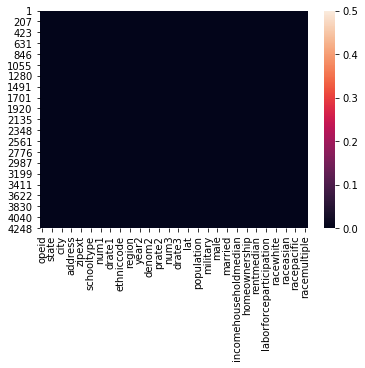

In [70]:
# Remove delete all missing row. Impact is not very significant 
cdr_clean = cdr.dropna(axis = 0)

# Veiw data 
sb.heatmap(cdr_clean.isnull(), xticklabels=2, vmin = 0, vmax = 0.5)

In [55]:
# Get all numeric variables
nVars = cdr_clean._get_numeric_data().columns
cdr_clean[nVars].describe()

,opeid,zipcode,zipext,proglength,schooltype,year1,num1,denom1,drate1,ethniccode,...,educationcollegeorabove,laborforceparticipation,unemploymentrate,racewhite,raceblack,raceasian,racenative,racepacific,raceother,racemultiple
count,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.0,4259.000000,4259.000000,4259.000000,4259.000000,...,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000
mean,14683.723879,50066.139235,3571.502700,5.817093,1.961493,2016.0,96.592862,1002.358065,10.295985,4.879314,...,33.365508,63.115637,7.110214,69.882062,15.815614,5.476638,0.709368,0.177812,4.481615,3.457220
std,14570.098895,29460.489029,2515.257284,2.043935,0.818080,0.0,320.799667,2693.864176,7.420402,0.543108,...,14.529974,6.826677,3.044538,19.308819,17.297563,7.566905,2.022671,0.759557,5.843676,2.289789
min,1003.000000,1002.000000,0.000000,1.000000,1.000000,2016.0,0.000000,3.000000,0.000000,1.000000,...,2.500000,6.900000,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2734.500000,24541.000000,1650.500000,4.000000,1.000000,2016.0,8.000000,92.000000,4.600000,5.000000,...,23.000000,59.800000,5.000000,57.800000,3.100000,1.500000,0.200000,0.000000,0.800000,2.300000
50%,7187.000000,48307.000000,3099.000000,6.000000,2.000000,2016.0,25.000000,317.000000,8.700000,5.000000,...,31.200000,63.800000,6.700000,73.700000,8.400000,3.000000,0.300000,0.000000,2.300000,3.100000
75%,25486.500000,76056.000000,5006.500000,8.000000,3.000000,2016.0,88.000000,949.500000,14.800000,5.000000,...,41.000000,67.600000,8.600000,85.900000,24.300000,6.400000,0.600000,0.100000,5.800000,4.200000
max,42636.000000,99801.000000,9999.000000,11.000000,3.000000,2016.0,13717.000000,111509.000000,66.600000,5.000000,...,95.300000,82.700000,41.100000,100.000000,97.400000,72.700000,58.400000,26.200000,51.600000,37.900000


# Remove and rename variables 
year(1 - 3) key for years (2016, 2015, 2014) 
num(1 -3) can be computed by (denom * drate)
zipext does not add value to the research 

In [74]:
# Rename variable for better undestanding 
cdr_clean.rename(columns={"denom1":"cohort2016", "drate1":"cdr2016","prate1":"prate2016",
                    "denom2":"cohort2015", "drate2":"cdr2015","prate2":"prate2015",
                    "denom3":"cohort2014", "drate3":"cdr2014","prate3":"prate2014"},
                    inplace = True)


In [84]:
# Remove low value/redundant variables 
low_value_vars = ['name','address','zipext','year1','num1','year2','num2','year3','num3']

cdr_clean.drop(low_value_vars, axis=1, inplace = True)

KeyError: "['name' 'address' 'zipext' 'year1' 'num1' 'year2' 'num2' 'year3' 'num3'] not found in axis"

In [113]:
# Get new numeric variabe list, keep 
nVar = cdr_clean._get_numeric_data().columns

# Get qualitative variable
qualVar = []
for v in list(cdr_clean.columns):
    if v not in nVar:
        qualVar.append(v)
        
# Get ordinal nVars 
ordVar = ['opeid','zipcode','schooltype','ethniccode','region','lat','lng','military']

# Get quantative Variables
quanVar = ['proglength','cohort2016','cdr2016','averageorgreaterthan30','cohort2015','cdr2015','cohort2014','cdr2014','population',
 'density','agemedian','male','female','married','familysize','incomehouseholdmedian','incomehouseholdsixfigure','homeownership',
 'homevalue','rentmedian','educationcollegeorabove','laborforceparticipation','unemploymentrate','racewhite','raceblack','raceasian',
 'racenative','racepacific','raceother','racemultiple']

In [115]:
# Show summary of qual Vars
cdr_clean[qualVar].describe().transpose()

,count,unique,top,freq
stateabv,4259,51,CA,448
state,4259,51,California,448
county,4259,868,Los Angeles,145
city,4259,1801,New York,67
prate2016,4259,3,A,3278
congdis,4259,62,1,472
prate2015,4259,3,A,3291
prate2014,4259,3,A,3297


In [117]:
# Show summary of quan Vars
cdr_clean[quanVar].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
proglength,4259.0,5.817093e+00,2.043935e+00,1.00,4.00,6.00,8.00,11.00
cohort2016,4259.0,1.002358e+03,2.693864e+03,3.00,92.00,317.00,949.50,111509.00
cdr2016,4259.0,1.029598e+01,7.420402e+00,0.00,4.60,8.70,14.80,66.60
averageorgreaterthan30,4259.0,9.063160e-02,2.871182e-01,0.00,0.00,0.00,0.00,1.00
cohort2015,4259.0,1.067870e+03,3.101318e+03,1.00,96.00,341.00,1014.00,139070.00
cdr2015,4259.0,1.042538e+01,7.745664e+00,0.00,4.50,9.00,15.00,100.00
cohort2014,4259.0,1.071821e+03,3.311209e+03,0.00,92.00,348.00,1031.50,159144.00
cdr2014,4259.0,1.083383e+01,8.374001e+00,0.00,4.60,9.40,15.70,100.00
population,4259.0,1.031716e+06,2.959840e+06,241.00,21571.50,74618.00,416581.00,19354922.00
density,4259.0,1.551464e+03,1.942550e+03,4.00,570.50,982.00,1727.00,21116.00
